# Univariate analysis

In [33]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

Seaborn contains some datasets that we will use here as examples.

In [34]:
# Example dataset, included with Seaborn
tips = sns.load_dataset("tips")    # Info on tips given at restaurants

We show the first rows of this dataset to get an idea of their contents:

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Qualitative Variables

### Visualisation using a Bar Chart

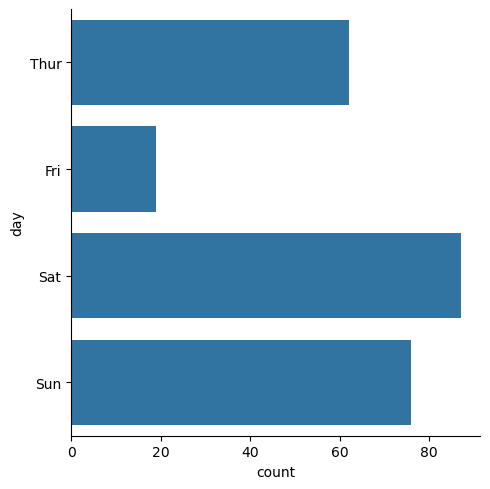

In [36]:
# Bar chart in Seaborn: catplot() with 'kind = "count"''
sns.catplot(data = tips, kind = "count", y = "day");

### Centrality Measures

In [37]:
# Mode for all the variables in the DataFrame
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [38]:
# Mode for a specific variable
tips["day"].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [39]:
# Some descriptive measures
tips["day"].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

## Quantitative Variables


### Visualisation

**Box-and-whisker plots** (sometimes referred to as boxplots) typically show only five 'points' from the distribution - the top and bottom of the range, the median and the upper and lower quartiles (UQ and LQ).  
These five values are sometimes known as the quartiles and the notation Q<sub>0</sub>, Q<sub>1</sub>, Q<sub>2</sub>, Q<sub>3</sub>, Q<sub>4</sub> is sometimes used to refer to minimum, LQ, median, UQ and maximum respectively. 

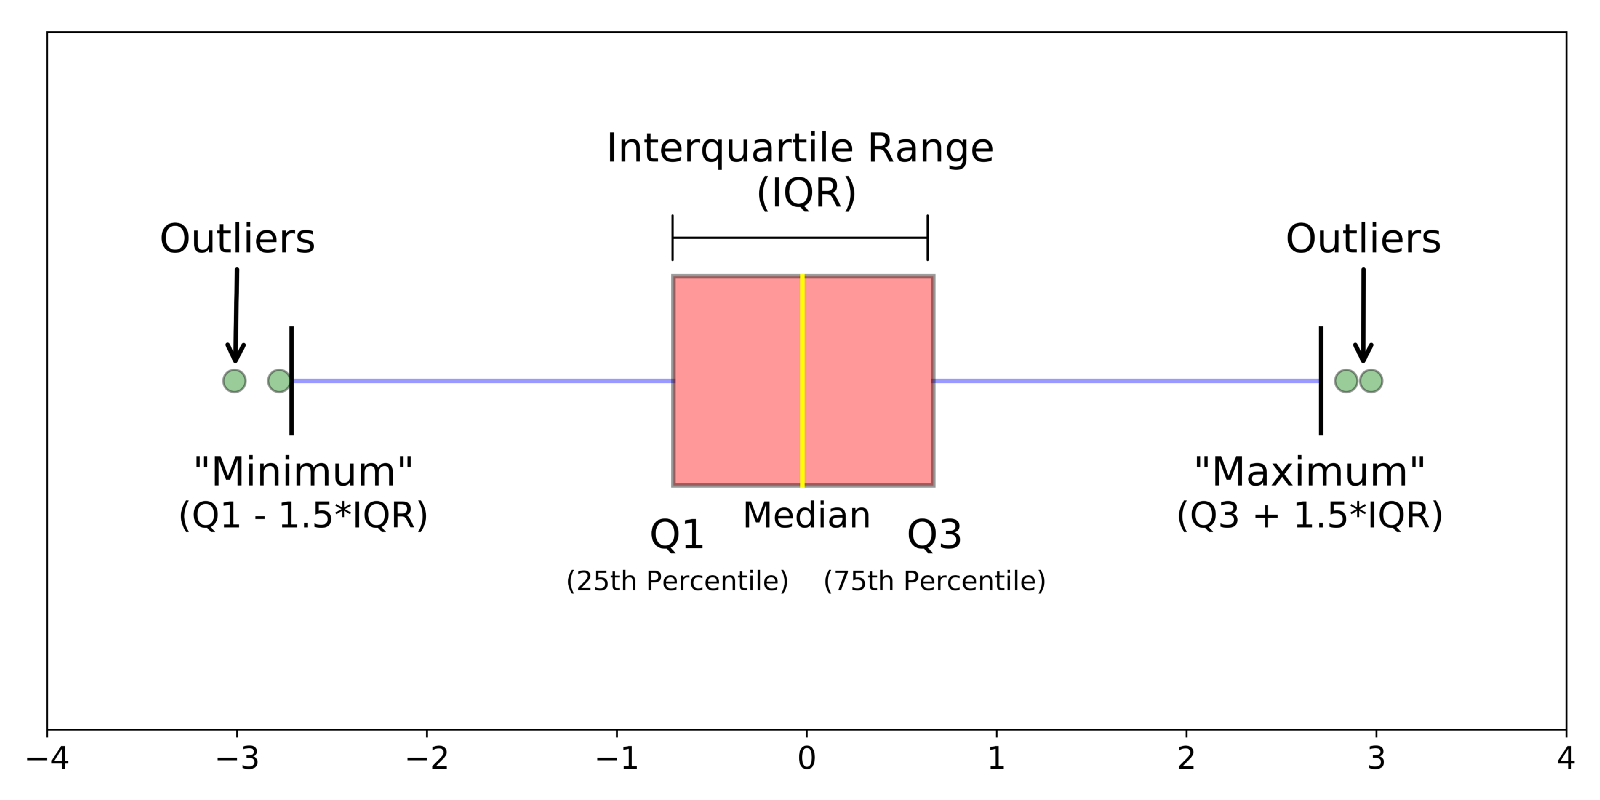

Source: https://spatiallychallenged.com/2019/05/31/box-and-whisker-plots/ 

/usr/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


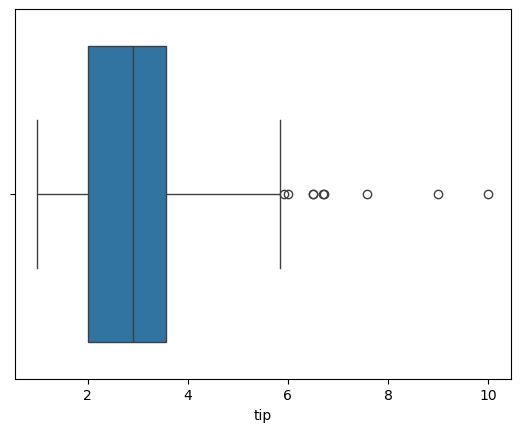

In [40]:
# Visualisation using a box plot (Seaborn)
sns.boxplot(data=tips, x="tip");

In a **histogram**, the domain of the variable is subdivided into intervals (also called *bins*), usually of equal size. The frequency of the variable in each interval is represented by the height of a bar.

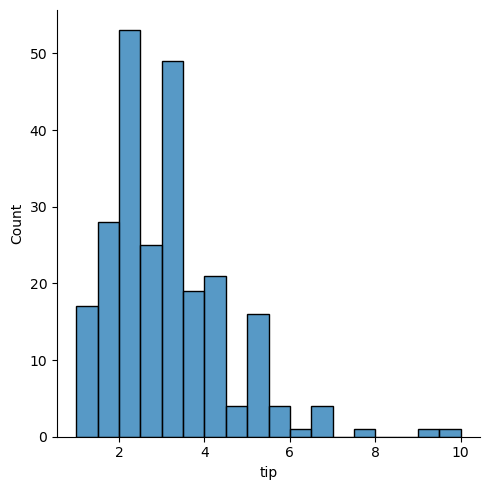

In [41]:
sns.displot(x=tips['tip']);

You can set the number of intervals with the parameter `bins`.

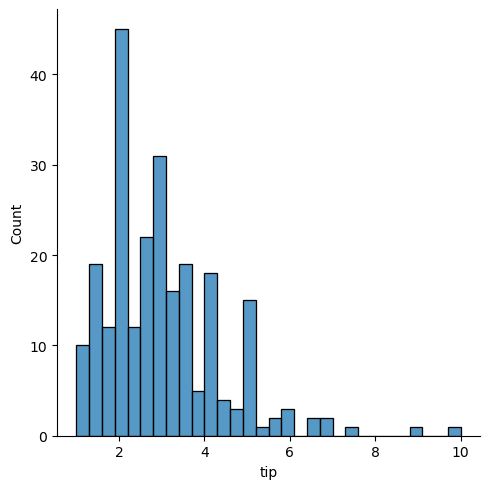

In [42]:
sns.displot(x=tips['tip'], bins=30);

A **kernel density** plot is a form of a graph that uses a single continuous curve to show the distribution of values in a dataset. A kernel density plot is similar to a histogram, but it is better at depicting the shape of distribution because the number of bins used in the histogram has no effect on it.

Below we show a plot of the probability density (kde or kernel density estimation).

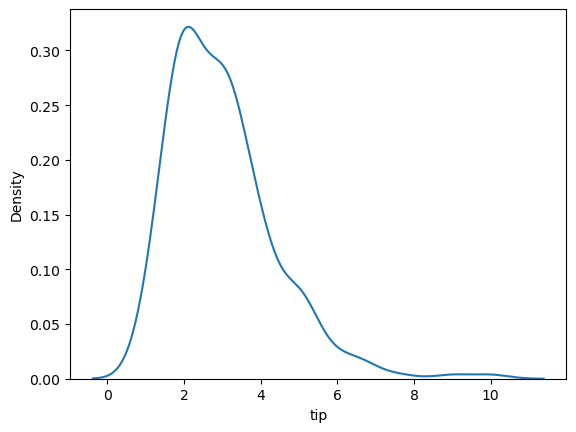

In [43]:
sns.kdeplot(x = tips["tip"]);

A histogram can be superimposed with a kernel density estimate:

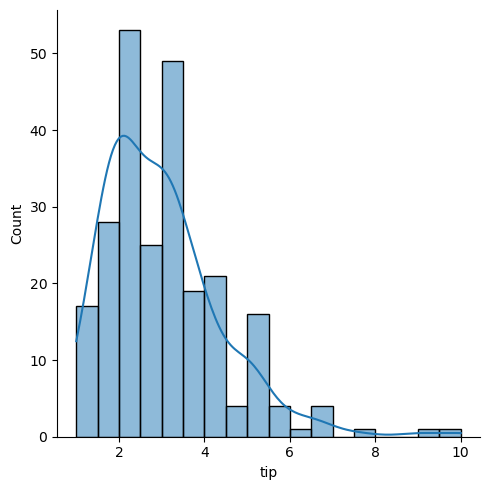

In [44]:
sns.displot(x = tips['tip'], kde=True);

A **violin plot** is a combination of a box plot and a kernel density plot.

/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


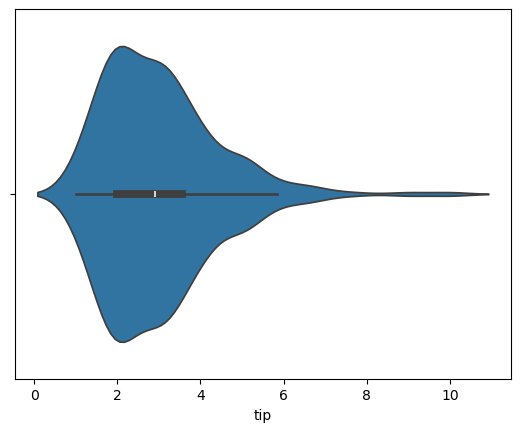

In [45]:
sns.violinplot(data = tips, x = "tip");

### Centrality and Dispersion Measures

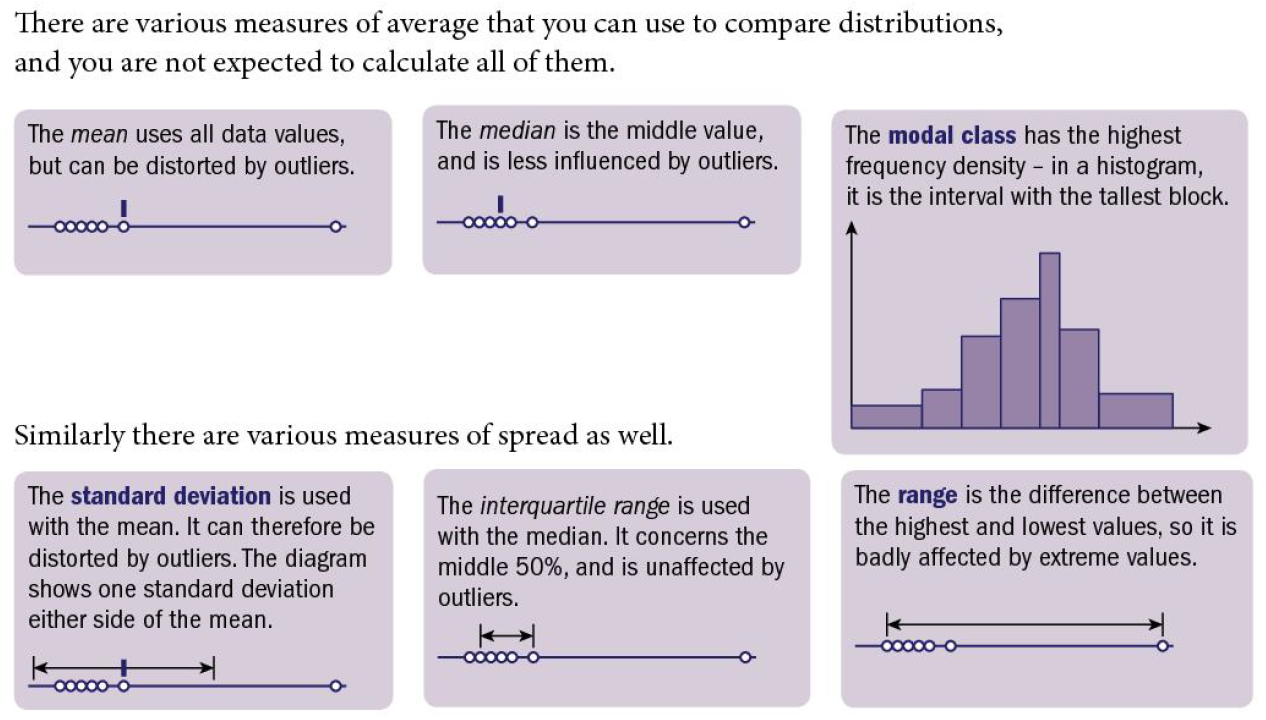

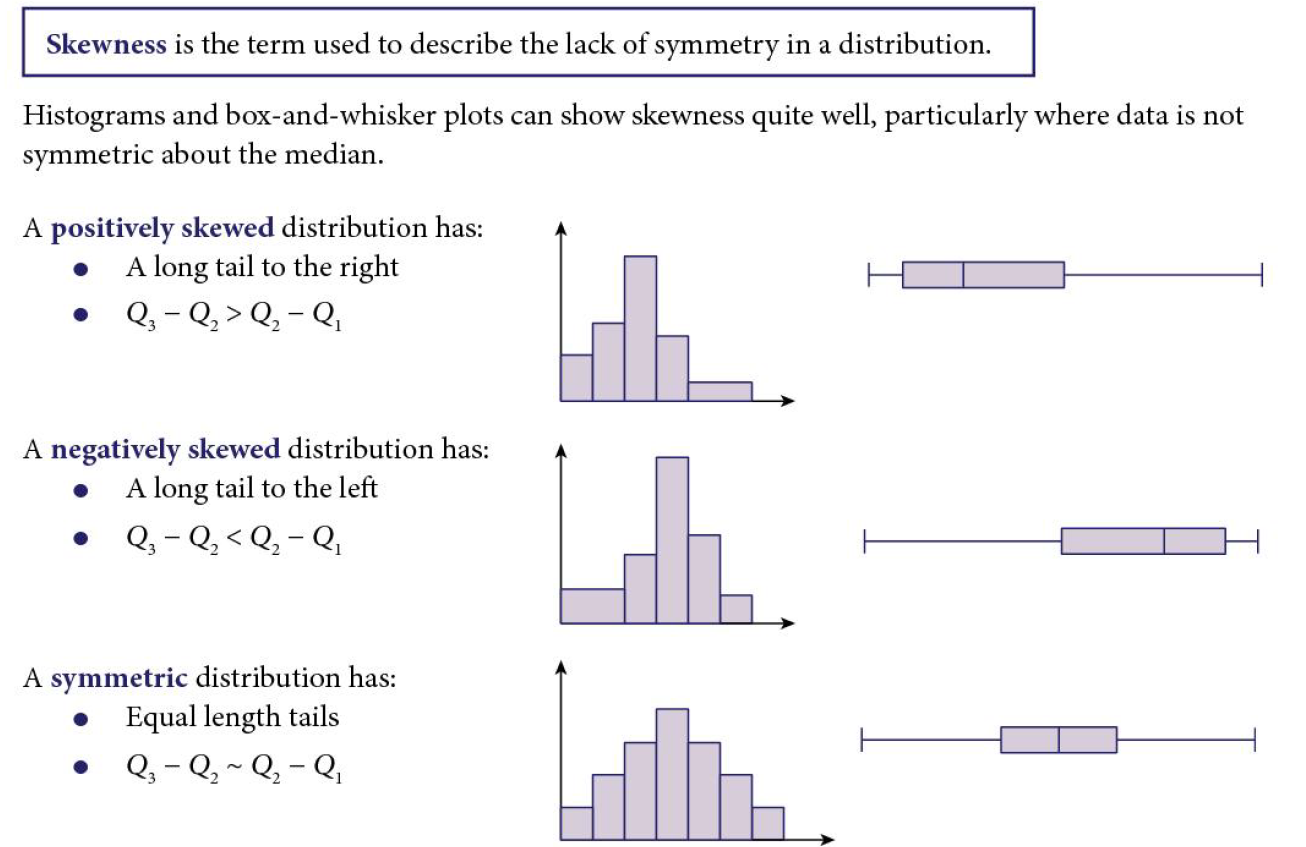

Source: Complete Probability & Statistics 1 for Cambridge International AS & A Level

In [46]:
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")

Mean:                2.99827868852459
Standard deviation:  1.3836381890011826
Variance:            1.9144546380624725
Skewness:            1.4654510370979401
Kurtosis:            3.648375873352852
Minimum:   1.0
Median:    2.9
Maximum:   10.0
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00     1.0000
0.25     2.0000
0.50     2.9000
0.75     3.5625
1.00    10.0000
Name: tip, dtype: float64
Inter Quartile Range: 1.5625
Range :    9.0


In [47]:
# Some descriptive measures
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

## Formula for  Standard Deviation

Why do we use $n-1$ in the denominator of the formula for the standard deviation of a sample and not $n$? The former gives a better ("unbiased") estimate for what the standard deviation in the population will be, based on our sample. We can prove this mathematically, but that is beyond the scope of this course. We will, however, investigate it empirically.

We will first define the functions for variance of the population and of a sample:

In [48]:
# Variance of the population
def pop_var(x):
    n = len(x)
    mean = sum(x) / n
    return 1/n * sum((x - mean) ** 2)

# Standard deviation of the population
def pop_sd(x):
    return np.sqrt(pop_var(x))

# Variance of a sample
def sample_var(x):
    n = len(x)
    mean = sum(x) / n
    return 1/(n-1) * sum((x - mean) ** 2)

# Standard deviation of the sample
def sample_sd(x):
    return np.sqrt(sample_var(x))

# If we calculate the variance in both ways, we see a difference:
a = np.array([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

print(f"Population variance: {pop_var(a)}")
print(f"Sample variance:     {sample_var(a)}")
print()
print(f"Population standard deviation: {pop_sd(a)}")
print(f"Sample standard deviation:     {sample_sd(a)}")

Population variance: 5.760000000000001
Sample variance:     6.3999999999999995

Population standard deviation: 2.4000000000000004
Sample standard deviation:     2.5298221281347035


What is the best formula for the standard deviation of a sample? Let us assume that our population consists of all numbers from 0 to 100. We first calculate the mean and standard deviation of this population.

In [49]:
population = np.arange(0, 101)

population_mean = sum(population) / len(population)
print(f'Population mean: {population_mean}')

population_variance = pop_var(population)
print(f'Population variance: {population_variance}')

population_stdev = pop_sd(population)
print(f'Population standard deviation: {population_stdev}')

Population mean: 50.0
Population variance: 850.0
Population standard deviation: 29.154759474226502


Now for the actual experiment: we repeatedly take a random sample from this population and look at the result of both formulas for the variance. We will choose the formula that comes closest to the true variance of the population over a large number of iterations.

In [50]:
sample_size = 15            # the size of the sample
num_samples = 5000          # number of times we will take a sample

# We are going to calculate the average of the result with each formula.
# In order to do this, we keep track of the sum of these results and 
# divide afterwards by the number of samples
sum_pop = 0
sum_smp = 0

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sum_pop = sum_pop + pop_sd(sample)
    sum_smp = sum_smp + sample_sd(sample)

print(f"Average result with formula population       : {sum_pop/num_samples}")
print(f"Average result with formula sample           : {sum_smp/num_samples}")
print(f"The true standard deviation of the population: {population_stdev}")

Average result with formula population       : 27.96511572847765
Average result with formula sample           : 28.94664484086823
The true standard deviation of the population: 29.154759474226502


We see that the formula with $n$ as denominator underestimates the true value of the standard deviation for the population. The formula with $n-1$ as denominator consistently gives a better estimate. Therefore, we will use this formula every time.

Note that we do not have to implement the formula for variance and standard deviation ourselves. Here we have done so to show how these formulas work. `numpy` already contains functions that do what we want:

In [51]:
a = np.array([1,2,3,4,5])

print(f"Population variance with numpy  : {np.var(a)}")
print(f"Population variance own function: {pop_var(a)}")  
print()
print(f"Sample variance with numpy  : {np.var(a, ddof=1)}")
print(f"Sample variance own function: {sample_var(a)}")  
print()
print(f"Standard deviation population: {np.std(a)}")
print(f"Standard deviation sample    : {np.std(a, ddof=1)}")

Population variance with numpy  : 2.0
Population variance own function: 2.0

Sample variance with numpy  : 2.5
Sample variance own function: 2.5

Standard deviation population: 1.4142135623730951
Standard deviation sample    : 1.5811388300841898


Note: `numpy` by default computes the 'population' versions of variance and standard deviations, 
while  `pandas` by default computes the 'sample' versions of these measures as can be seen 
from the computations below.

In [52]:
print(f"Numpy  uses ddof=0 by default: {np.std(tips['tip'])}")
print(f"Pandas uses ddof=1 by default: {tips['tip'].std()}")

Numpy  uses ddof=0 by default: 1.3807999538298958
Pandas uses ddof=1 by default: 1.3836381890011826
